In [2]:
# Feature Extraction with PCA on the original training data set
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn import svm
from sklearn.neural_network import MLPClassifier


# load data
df_data = pd.read_csv("../data/train.csv")
# print(df_data.head())

X_cols = []
for col in df_data.columns:
    X_cols.append(col)
# print(X_cols)
X_cols = X_cols[1:-1]

X = df_data[X_cols]
Y = df_data['Pawpularity'].values[:]

# X.columns

## PCA

In [3]:
# feature extraction
pca = PCA()
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_,"\n")

df = pd.DataFrame(fit.components_, columns=list(X.columns))
print(df)

Explained Variance: [0.23556394 0.21572752 0.14820756 0.08027695 0.06790891 0.06477685
 0.05564356 0.04698603 0.02613192 0.02497958 0.02436973 0.00942745] 

    Subject Focus      Eyes      Face      Near    Action  Accessory  \
0       -0.011471 -0.684099 -0.359454 -0.219352  0.005252  -0.022198   
1       -0.046191 -0.432326 -0.226279 -0.096265  0.000309  -0.049986   
2       -0.024759  0.251818  0.062877 -0.667234  0.001011  -0.012997   
3       -0.003722 -0.047629  0.041977 -0.431815  0.006792   0.246359   
4       -0.023328 -0.121834  0.422651  0.385683 -0.005185   0.258161   
5        0.013966  0.032968 -0.545595  0.328303 -0.002414   0.470159   
6        0.012369 -0.010335  0.149156 -0.202085  0.017767   0.804022   
7       -0.031185 -0.013350 -0.000453  0.065633 -0.003062  -0.039166   
8        0.377745  0.454676 -0.515402 -0.005836  0.004867  -0.004084   
9        0.923221 -0.213748  0.214051 -0.014617  0.013292  -0.013381   
10      -0.002904 -0.103763  0.062149  0.094352  0.

In [4]:
# number of components
n_pcs= fit.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(fit.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [X_cols[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
print(df)

       0              1
0    PC0           Eyes
1    PC1      Occlusion
2    PC2           Near
3    PC3          Group
4    PC4           Blur
5    PC5           Face
6    PC6      Accessory
7    PC7          Human
8    PC8           Blur
9    PC9  Subject Focus
10  PC10        Collage
11  PC11         Action


reference for ahbove code :
https://stackoverflow.com/questions/47370795/pca-on-sklearn-how-to-interpret-pca-components

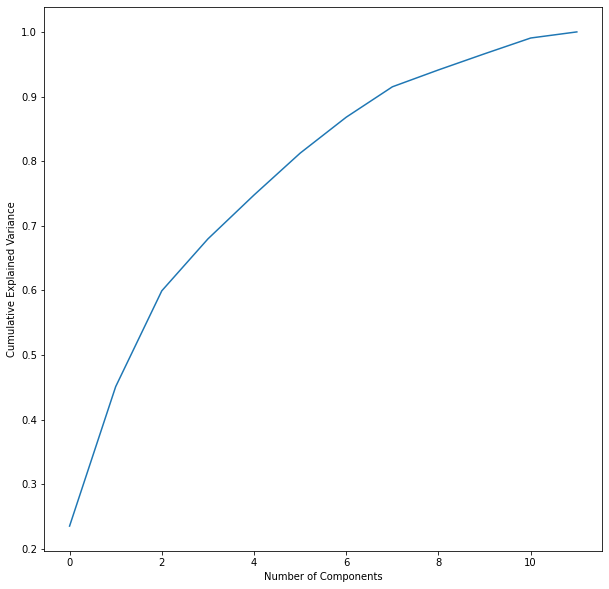

In [5]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(fit.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

OK so because we see that ~7 of the features explains ~90% of the variance, I will use 7 as the number of features and run a quick model below.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv("../data/train.csv")
df2.columns

y = df2.Pawpularity 
x = df2.drop(['Id','Pawpularity'], axis = 1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# x_train.head()

## PCA Object

In [11]:
# PCA 'Transform' using 7 components
random_state = 0
pca = PCA(n_components=7, random_state=random_state)
pca.fit(x_train)

# Make a list of n & k values
n_k=[3,4,5,6,7,8]

## KNN + PCA


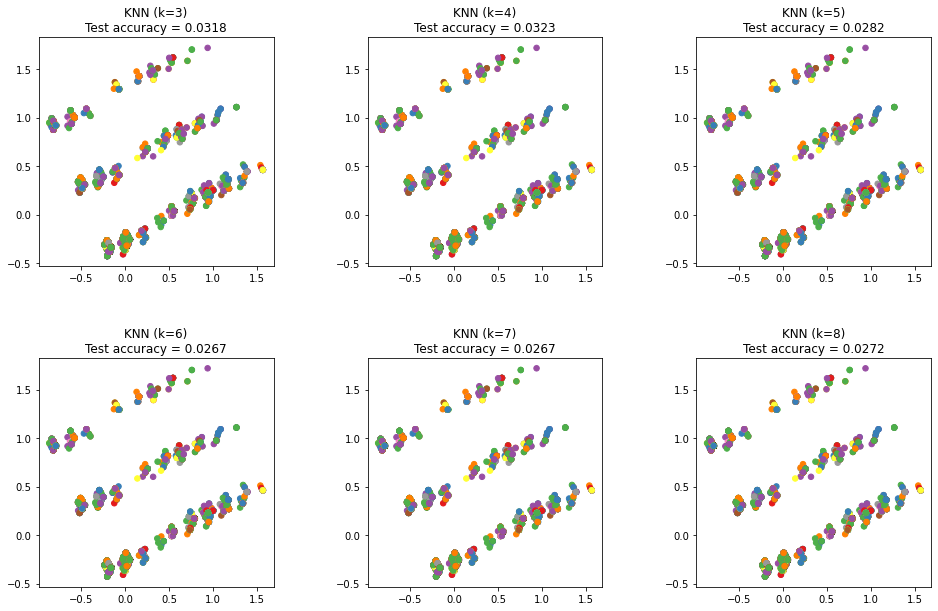

In [12]:
# Plot object
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 1
for v in n_k:
    knn = KNeighborsClassifier(n_neighbors=v)
    ax = fig.add_subplot(3, 3, i)

    # Fitting
    # This is the PCA object we want to feed for modeling as our 'new' training set
    pca.fit(x_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(pca.transform(x_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(pca.transform(x_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = pca.transform(x)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
    plt.title(
        "KNN (k={})\nTest accuracy = {:.4f}".format(v, acc_knn)
    )
    i+=1 
plt.show()

## PCA with KMeans

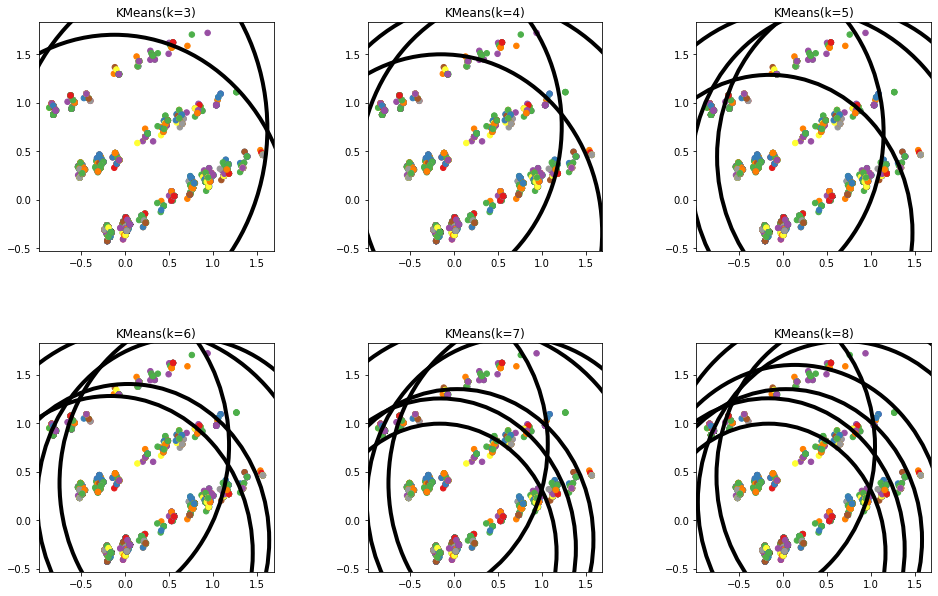

In [13]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 1

for k in n_k:

    p = pca.fit_transform(x_train)
    km = KMeans(n_clusters=k)
    
    # Fit the method's model
    model = km.fit(p)
    c = km.cluster_centers_
    d = np.array(km.transform(p))
    
    g = plt.subplot(3,3,i)

    # Plot the projected points and show the evaluation score
    g.scatter(p[:, 0], p[:, 1], c=y_train, s=30, cmap="Set1")
    plt.title("KMeans(k={})".format(k))
    
    for b in range(0,k):
        a =  plt.Circle(c[b], np.max(d[model.labels_ == b,b]), fill=False, linewidth = 4)
        g.add_artist(a)
    
    i+=1
plt.show()

## NB

In [15]:
NB_mod = BernoulliNB(alpha=0.1)
NB_mod.fit(pca.transform(x_train), y_train)
acc = NB_mod.score(pca.transform(x_test), y_test)
print(acc)
print(metrics.f1_score(y_test, NB_mod.predict(pca.transform(x_test)), average="weighted"))
print(metrics.mean_squared_error(y_test, NB_mod.predict(pca.transform(x_test)), squared=False))

0.033787191124558746
0.009497244002807485
22.911194734790495


In [16]:
NB_mod = BernoulliNB(alpha=0.1)
NB_mod.fit(x_train, y_train)
acc = NB_mod.score(x_test, y_test)
print(acc)
print(metrics.f1_score(y_test, NB_mod.predict(x_test), average="weighted"))
print(metrics.mean_squared_error(y_test, NB_mod.predict(x_test), squared=False))

0.03731719616742309
0.017567900401400077
23.28635137506703


## RF


In [23]:
RF_model = RandomForestClassifier(n_estimators=5,criterion="entropy", min_samples_split=10)
RF_model.fit(pca.transform(x_train), y_train)
# acc = RF_model.score(pca.transform(x_test), y_test)
# print(acc)
print((metrics.f1_score(y_test, RF_model.predict(pca.transform(x_test)), average="weighted")))
print(metrics.mean_squared_error(y_test, RF_model.predict(pca.transform(x_test)), squared=False))

0.01386835723323761
27.765969586349687


In [24]:
from sklearn.ensemble import RandomForestClassifier 

RF_model = RandomForestClassifier(n_estimators=5,criterion="entropy", min_samples_split=10)
RF_model.fit(x_train, y_train)
# acc = RF_model.score(x_test, y_test)
# print(acc)
print((metrics.f1_score(y_test, RF_model.predict(x_test), average="weighted")))
print(metrics.mean_squared_error(y_test, RF_model.predict(x_test), squared=False))

0.011244660353185231
26.024204180482315
